--- Skrip Plot Model Fitted (untuk Gambar 4.5) ---
✓ File data\kejadian.csv ditemukan.

Langkah 1 & 2: Memuat dan mempersiapkan data...
✓ 29 titik data siap.
Langkah 3: Menghitung model Kriging (model=spherical)...
✓ Model berhasil di-fit.
Langkah 4: Mengekstrak data eksperimental dan data model...
✓ Data plot (eksperimental dan model) siap.

Langkah 5: Membuat plot gabungan dan menyimpannya sebagai 'semivariogram_fitted_model.png'...

--- Selesai ---
✓ Plot telah berhasil dibuat dan disimpan sebagai: semivariogram_fitted_model.png
Gambar ini sekarang dapat Anda screenshot untuk lampiran skripsi Anda (Gambar 4.5).


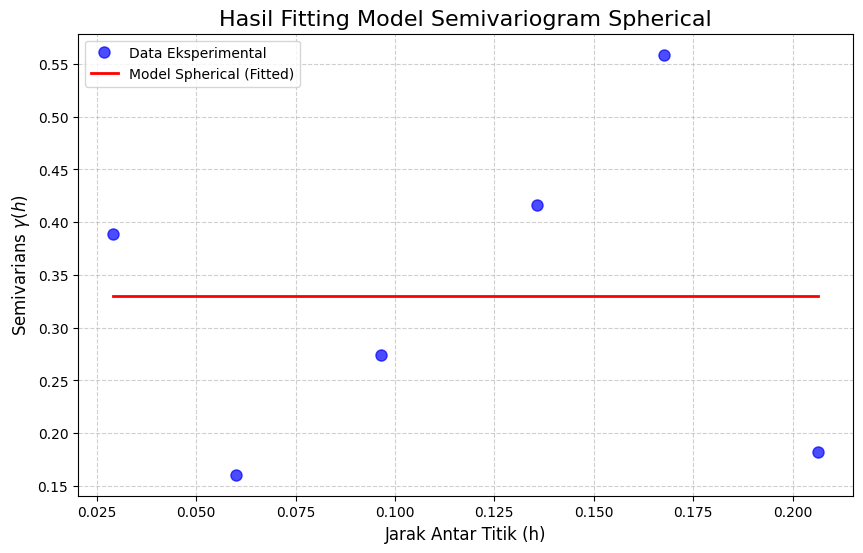

In [1]:
import pandas as pd
import numpy as np
from pykrige.ok import OrdinaryKriging
import matplotlib.pyplot as plt
import os
from pathlib import Path

DATA_DIR = Path('data') 
KEJADIAN_FILE = DATA_DIR / 'kejadian.csv'
OUTPUT_PLOT_FILE = 'semivariogram_fitted_model.png' 

print(f"--- Skrip Plot Model Fitted (untuk Gambar 4.5) ---")

if not KEJADIAN_FILE.exists():
    print(f"❌ ERROR: File {KEJADIAN_FILE} tidak ditemukan.")
    print("Pastikan path direktori dan nama file sudah benar.")
else:
    print(f"✓ File {KEJADIAN_FILE} ditemukan.")
    
    try:
        print("\nLangkah 1 & 2: Memuat dan mempersiapkan data...")
        df_crime = pd.read_csv(KEJADIAN_FILE)
        lons = df_crime['longitude'].values
        lats = df_crime['latitude'].values
        values = df_crime['jumlah_kejadian'].values
        print(f"✓ {len(values)} titik data siap.")
        print("Langkah 3: Menghitung model Kriging (model=spherical)...")
        OK_model = OrdinaryKriging(
            lons, lats, values,
            variogram_model="spherical",
            verbose=False, 
            enable_plotting=False
        )
        print("✓ Model berhasil di-fit.")
        print("Langkah 4: Mengekstrak data eksperimental dan data model...")
        lags_exp = OK_model.lags
        semivariance_exp = OK_model.semivariance
        lags_model = np.linspace(lags_exp.min(), lags_exp.max(), 100)
        params = OK_model.variogram_model_parameters
        semivariance_model = OK_model.variogram_function(params, lags_model)

        
        print("✓ Data plot (eksperimental dan model) siap.")

        print(f"\nLangkah 5: Membuat plot gabungan dan menyimpannya sebagai '{OUTPUT_PLOT_FILE}'...")
        
        plt.figure(figsize=(10, 6))
        
        plt.plot(lags_exp, semivariance_exp, 'bo', markersize=8, alpha=0.7, label='Data Eksperimental')
        
        plt.plot(lags_model, semivariance_model, 'r-', linewidth=2, label='Model Spherical (Fitted)')
        
        plt.title('Hasil Fitting Model Semivariogram Spherical', fontsize=16)
        plt.xlabel('Jarak Antar Titik (h)', fontsize=12)
        plt.ylabel('Semivarians $\gamma(h)$', fontsize=12) 
        
        plt.grid(True, linestyle='--', alpha=0.6)
        plt.legend() 
        plt.savefig(OUTPUT_PLOT_FILE)
        
        print(f"\n--- Selesai ---")
        print(f"✓ Plot telah berhasil dibuat dan disimpan sebagai: {OUTPUT_PLOT_FILE}")
        print("Gambar ini sekarang dapat Anda screenshot untuk lampiran skripsi Anda (Gambar 4.5).")

    except Exception as e:
        print(f"❌ Terjadi error saat eksekusi: {e}")